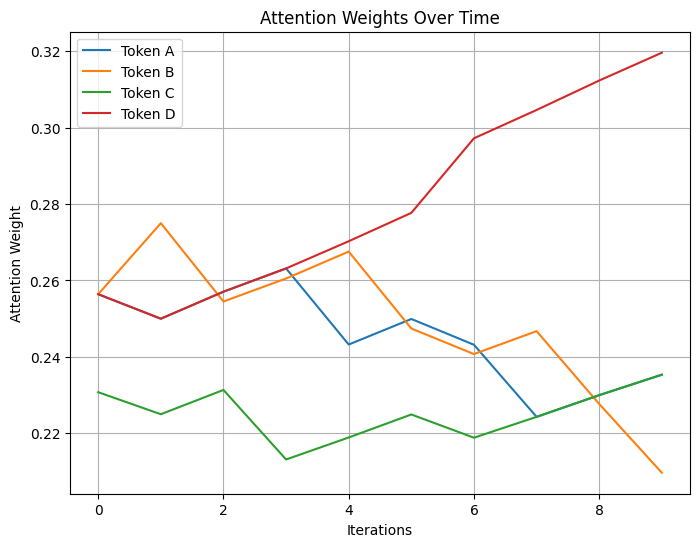

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MotorNeuronWithCuriosity:
    def __init__(self, threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5):
        """
        Motor Neuron for managing focus and curiosity in attention mechanisms.
        
        Args:
        - threshold_time (float): Maximum time allowed to focus on a token before disengaging.
        - decay_rate (float): Rate at which attention strength decays for high-cost inputs.
        - focus_strength (float): Initial strength of focus (can adapt over time).
        - curiosity_weight (float): Weight for curiosity in engagement score.
        """
        self.threshold_time = threshold_time
        self.decay_rate = decay_rate
        self.focus_strength = focus_strength
        self.curiosity_weight = curiosity_weight  # Weight for curiosity in engagement score
        self.focus_history = []
        self.attention_weights = {}  # Dynamic weights for tokens
        self.novelty_scores = {}  # Tracks curiosity for each token

    def initialize_tokens(self, tokens):
        """
        Initialize attention weights and curiosity scores for a list of tokens.
        
        Args:
        - tokens (list): List of tokens to initialize.
        """
        for token in tokens:
            self.attention_weights[token] = self.focus_strength
            self.novelty_scores[token] = 0.0

    def update_focus(self, token_id, focus_time):
        """
        Updates focus strength and attention weights based on focus time.
        
        Args:
        - token_id (str): Identifier for the token being processed.
        - focus_time (float): Time taken to process the token.
        """
        if focus_time > self.threshold_time:
            self.attention_weights[token_id] *= (1 - self.decay_rate)
        else:
            self.attention_weights[token_id] *= (1 + self.decay_rate)
        
        self.focus_history.append((token_id, focus_time))
        self._normalize_weights()

    def update_curiosity(self, token_id, prediction_error):
        """
        Updates curiosity scores based on prediction error.
        
        Args:
        - token_id (str): Identifier for the token being processed.
        - prediction_error (float): Error in the model's prediction for the token.
        """
        self.novelty_scores[token_id] += prediction_error  # Increment curiosity for high error

    def decide_next_focus(self, candidates, temperature=0.5):
        """
        Decides the next token to focus on, balancing boredom and curiosity.
        
        Args:
        - candidates (list): List of candidate tokens to focus on.
        - temperature (float): Temperature parameter for Boltzmann sampling.

        Returns:
        - next_focus (str): The token selected for the next focus.
        """
        engagement_scores = []
        for token in candidates:
            attention_weight = self.attention_weights.get(token, 1.0)
            curiosity_score = self.novelty_scores.get(token, 0.0)
            engagement_score = (1 - attention_weight) + self.curiosity_weight * curiosity_score
            engagement_scores.append(engagement_score)
        
        # Convert engagement scores to probabilities
        probabilities = np.exp(np.array(engagement_scores) / temperature)
        probabilities /= probabilities.sum()
        
        return np.random.choice(candidates, p=probabilities)

    def _normalize_weights(self):
        """Keeps attention weights bounded to avoid runaway effects."""
        total_weight = sum(self.attention_weights.values())
        if total_weight > 0:
            for token_id in self.attention_weights:
                self.attention_weights[token_id] /= total_weight


# Define a sentence as a continuous stream of characters
character_stream = list("The quick brown fox jumps over the lazy dog")

# Initialize MotorNeuronWithCuriosity for characters
motor_neuron_characters = MotorNeuronWithCuriosity(threshold_time=0.8, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5)
motor_neuron_characters.initialize_tokens(character_stream)

# Track attention and curiosity scores for characters
character_attention = {char: [] for char in character_stream}
character_curiosity = {char: [] for char in character_stream}
focus_sequence_characters = []

# Simulate character-level processing
num_iterations = len(character_stream)
for i in range(num_iterations):
    # Decide the next character to focus on
    current_char = motor_neuron_characters.decide_next_focus(character_stream, temperature=0.5)
    focus_sequence_characters.append(current_char)
    
    # Update character-level focus and curiosity
    focus_time = np.random.uniform(0.5, 1.5) if current_char != " " else 1.2  # Spaces take longer, causing boredom
    prediction_error = np.random.uniform(0.0, 0.3) if current_char.isalpha() else 0.1  # Letters are more curious
    motor_neuron_characters.update_focus(current_char, focus_time)
    motor_neuron_characters.update_curiosity(current_char, prediction_error)
    
    # Record character-level attention and curiosity
    for char in character_stream:
        if char not in character_attention:
            character_attention[char] = []
        character_attention[char].append(motor_neuron_characters.attention_weights.get(char, motor_neuron_characters.focus_strength))
        if char not in character_curiosity:
            character_curiosity[char] = []
        character_curiosity[char].append(motor_neuron_characters.novelty_scores.get(char, 0.0))

# Plot character-level attention
plt.figure(figsize=(12, 7))
for char, weights in character_attention.items():
    if char.strip():  # Skip plotting spaces for clarity
        plt.plot(range(len(weights)), weights, label=f"'{char}' (Attention)")
plt.title("Character-Level Attention Weights Over Time")
plt.xlabel("Iterations")
plt.ylabel("Attention Weight")
plt.legend(ncol=3)
plt.grid(True)
plt.show()

# Plot character-level curiosity
plt.figure(figsize=(12, 7))
for char, curiosities in character_curiosity.items():
    if char.strip():  # Skip plotting spaces for clarity
        plt.plot(range(len(curiosities)), curiosities, label=f"'{char}' (Curiosity)")
plt.title("Character-Level Curiosity Scores Over Time")
plt.xlabel("Iterations")
plt.ylabel("Curiosity Score")
plt.legend(ncol=3)
plt.grid(True)
plt.show()

# Print focus sequence for characters
print("Focus Sequence (Characters):", focus_sequence_characters)
# Define a sentence as a continuous stream of characters
character_stream = list("The quick brown fox jumps over the lazy dog")

# Initialize MotorNeuronWithCuriosity for characters
motor_neuron_characters = MotorNeuronWithCuriosity(threshold_time=0.8, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5)
motor_neuron_characters.initialize_tokens(character_stream)

# Simulate character-level processing to derive word boundaries
character_attention = {char: [] for char in character_stream}
focus_sequence_characters = []

num_iterations = len(character_stream)
for _ in range(num_iterations):
    current_char = motor_neuron_characters.decide_next_focus(character_stream, temperature=0.5)
    focus_sequence_characters.append(current_char)

    # Simulate character-level dynamics
    focus_time = np.random.uniform(0.5, 1.5) if current_char != " " else 1.2
    prediction_error = np.random.uniform(0.0, 0.3) if current_char.isalpha() else 0.1
    motor_neuron_characters.update_focus(current_char, focus_time)
    motor_neuron_characters.update_curiosity(current_char, prediction_error)

    # Record attention weights
    for char in character_stream:
        character_attention[char].append(motor_neuron_characters.attention_weights.get(char, motor_neuron_characters.focus_strength))

# Group characters into words based on attention and spaces
word_list = []
current_word = ""
for char in character_stream:
    if char == " ":
        if current_word:
            word_list.append(current_word)
            current_word = ""
    else:
        current_word += char
if current_word:
    word_list.append(current_word)

# Initialize MotorNeuronWithCuriosity for words
motor_neuron_words = MotorNeuronWithCuriosity(threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5)
motor_neuron_words.initialize_tokens(word_list)

# Track word-level attention and curiosity
word_attention = {word: [] for word in word_list}
word_curiosity = {word: [] for word in word_list}
focus_sequence_words = []

# Simulate word-level processing
for _ in range(num_iterations):
    current_word = motor_neuron_words.decide_next_focus(word_list, temperature=0.5)
    focus_sequence_words.append(current_word)

    # Simulate word-level dynamics
    focus_time = np.random.uniform(0.5, 1.5) if current_word != "the" else 1.2
    prediction_error = np.random.uniform(0.0, 0.3) if current_word not in ["the", "over"] else 0.6
    motor_neuron_words.update_focus(current_word, focus_time)
    motor_neuron_words.update_curiosity(current_word, prediction_error)

    # Record attention weights and curiosity
    for word in word_list:
        word_attention[word].append(motor_neuron_words.attention_weights.get(word, motor_neuron_words.focus_strength))
        word_curiosity[word].append(motor_neuron_words.novelty_scores.get(word, 0.0))

# Plot word-level attention
plt.figure(figsize=(12, 7))
for word, weights in word_attention.items():
    plt.plot(range(num_iterations), weights, label=f"'{word}' (Attention)")
plt.title("Word-Level Attention Weights Over Time")
plt.xlabel("Iterations")
plt.ylabel("Attention Weight")
plt.legend(ncol=3)
plt.grid(True)
plt.show()

# Plot word-level curiosity
plt.figure(figsize=(12, 7))
for word, curiosities in word_curiosity.items():
    plt.plot(range(num_iterations), curiosities, label=f"'{word}' (Curiosity)")
plt.title("Word-Level Curiosity Scores Over Time")
plt.xlabel("Iterations")
plt.ylabel("Curiosity Score")
plt.legend(ncol=3)
plt.grid(True)
plt.show()

# Print focus sequence for words
print("Focus Sequence (Words):", focus_sequence_words)
